### Clusterless Decoding Implementation

***We first simulate the movement of the mouse running back and fourth along a linear track with the following transition probability***

$p(x_k | x_{k-1}) \sim N(\alpha x_{k-1}, \sigma)$

In [94]:
import numpy as np
import matplotlib.pyplot as plt

In [95]:
alpha = 0.98
sigma = 0.05
n_timesteps = 1000
x = np.zeros(n_timesteps)

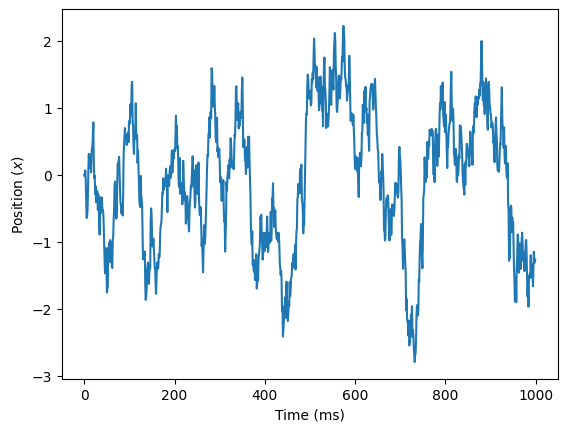

In [96]:
x[0] = 0
for k in range(n_timesteps - 1):
    x[k + 1] = np.random.normal(alpha * x[k], np.sqrt(sigma))

plt.figure()
plt.plot(x)
plt.xlabel('Time (ms)')
plt.ylabel('Position ($x$)')
plt.show()




We now define our simulation joint mark intensity $\lambda(t, \vec{m})$ of two hippocampal place cells using a bivariate Gaussian mixture function as in Eq. 8




In [97]:
def joint_mark_intensity(x, m, mu_x, mu_m, sigma_x, sigma_m, a):
    '''
    The joint mark intensity function for our simulation model.
    '''
    
    jmi = 0
    for c in [0,1]:
        jmi += np.exp( (a[c]- (x - mu_x[c])**2) / (2*sigma_x[c]**2)  -  ((m - mu_m[c])**2) / (2*sigma_m[c]**2))
        
    return jmi



We also integrate the joint mark intensity to get our ground process rate $ \Lambda(t) = \int_M \lambda(t, \vec{m})dm$ 

In [98]:
def ground_process_rate(x, mu_x, sigma_x, a):
    '''
    The ground process for our simulation model, which is the integral of the joint mark intensity function with respect to m.
    '''

    rate = 0
    for c in [0,1]:
        rate += np.exp((a[c]- (x - mu_x[c])**2) / (2*sigma_x[c]**2))
    
    return rate
    


Finally, we can get that the marks associated with the spike trains which are sampled from the pdf $f(\vec{m}|t) = \frac{\lambda(t, \vec{m})}{\Lambda(t|H_t)}$

In [99]:
def marks_pdf(m, t, x, mu_x, mu_m, sigma_x, sigma_m, a):
    '''
    The marks pdf for our simulation model which is the joint mark intensity divided by the ground process rate.
    '''
    
    return joint_mark_intensity(x[t], m, mu_x, mu_m, sigma_x, sigma_m, a) / ground_process_rate(x[t], mu_x, mu_m, sigma_x, sigma_m, a)

First thing to do is simulate our ground process (spikes) by using the ground process rate $ \Lambda(t)$ with an inhomogenous Poisson process

In [102]:
# use the ground process rate to simulate an inhomogeneous Poisson process

def HomogeneousPoisson(rate, t_old):
    u = np.random.rand()
    t_new = -np.log(u) / rate + t_old
    return t_new

def InHomoPoisson(rate, t_old):
    gmax = np.max(rate)
    
    while True:
        t = HomogeneousPoisson(gmax, t_old)
        u = np.random.rand()

        if t > len(rate):
            return None

        if u * gmax < rate[int(t)]:
            return t
        else:
            t_old = t
            


[]


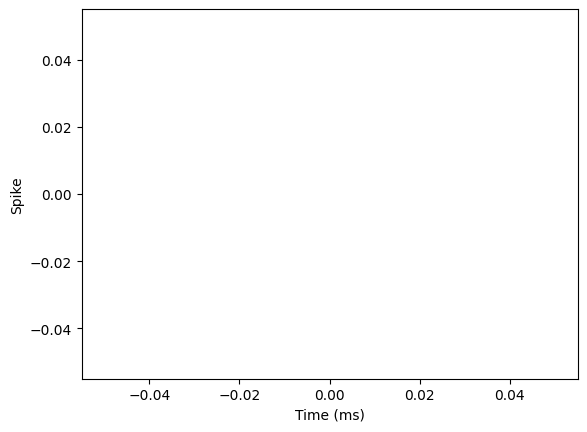

In [105]:

mu_x = [-1.5, 1.5]
sigma_x = [np.sqrt(0.1), np.sqrt(0.1)]
a = [0.01, 0.01]
mu_m = [10, 13]
sigma_m = [1, 1]

# simulating the underlying unmarked spike trains under an inhomogenous Poisson process model wirh rate given by the integral of the jmi over the marks
n_timesteps = 1000
x = np.zeros(n_timesteps)
m = np.zeros(n_timesteps)
rate = np.zeros(n_timesteps)
x[0] = 0

for k in range(n_timesteps):
    rate[k] = ground_process_rate(x[k], mu_x, sigma_x, a)


# simulating the spike times using the inhomogeneous Poisson process
spike_times = []
t = 0
while t < n_timesteps:
    t = InHomoPoisson(rate, t)
    if t is not None:
        spike_times.append(t)
    else:
        break

print(spike_times)

# plotting the spike times
plt.figure()
plt.plot(spike_times, np.ones(len(spike_times)), 'k|')
plt.xlabel('Time (ms)')
plt.ylabel('Spike')
plt.show()







    

 

    